<a href="https://colab.research.google.com/github/Lokuhu/112-2_2LNN/blob/main/%E5%9B%9BD56_HW1_EB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
# 試算表>檔案>共用>發布到網路 即可於colab中讀取
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQhbAejyGUXlZltX2nsbC4sTw890L6081piAP8ZDJVbufqZ9xm-S5P7gIrXnpgszm-U9SmEkBxJc5uF/pub?gid=1265524659&single=true&output=csv'
seed = pd.read_csv(url)

In [ ]:
seed['Type'] = seed['Type'].replace(1, 0.0)
seed['Type'] = seed['Type'].replace(2, 1.0)
seed['Type'] = seed['Type'].replace(3, 2.0)
seed

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
# Split data
X = seed.drop('Type',axis=1)
y = seed['Type']

# Covert these to numpy arr
X = X.values
y = y.values

# 20%test, 80%training
X_train, X_test, y_train, y_test=train_test_split (X, y ,test_size = 0.2, random_state = 30)

# Covert X and y to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Model 1

In [ ]:
# hidden nodes = 8, activation function = ReLU, Optimizer = Adam, learning epochs = 100, learning rate = 0.01
class Model1(nn.Module):
    #Input layer (7 features)
    #Hidden layer1 (numbers of neurons)
    #output (3 types)
    def __init__ (self,in_features = 7, h1 = 8, out_features = 3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.out=nn.Linear(h1,out_features)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.out(x))

        return x

In [ ]:
# 手動
torch.manual_seed(45)
model1 = Model1()

In [ ]:
# 設定優化器
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model1.parameters(),lr=0.01)

In [ ]:
# 印出model
model1

Model1(
  (fc1): Linear(in_features=7, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
#Train the model1
epochs=100
losses=[]
for i in range(epochs):
    #go forward and get a predictions
    y_pred=model1.forward(X_train)#get predicted results

    #Measure the loss/error, gonna be heigh at first
    loss=criterion(y_pred,y_train)

    #Keep track the loss
    losses.append(loss.detach().numpy())

    #print every 10 epoch
    if i%10 ==0:
        print(f'Epoch: {i} and loss: {loss}')
    #Do some back propagation: take the error rate of forward propagation and feed it back
    #thru the network to find tuns and weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.0986120700836182
Epoch: 10 and loss: 1.0986120700836182
Epoch: 20 and loss: 1.0986120700836182
Epoch: 30 and loss: 1.0986120700836182
Epoch: 40 and loss: 1.0986120700836182
Epoch: 50 and loss: 1.0986120700836182
Epoch: 60 and loss: 1.0986120700836182
Epoch: 70 and loss: 1.0986120700836182
Epoch: 80 and loss: 1.0986120700836182
Epoch: 90 and loss: 1.0986120700836182


Text(0.5, 0, 'Epoch')

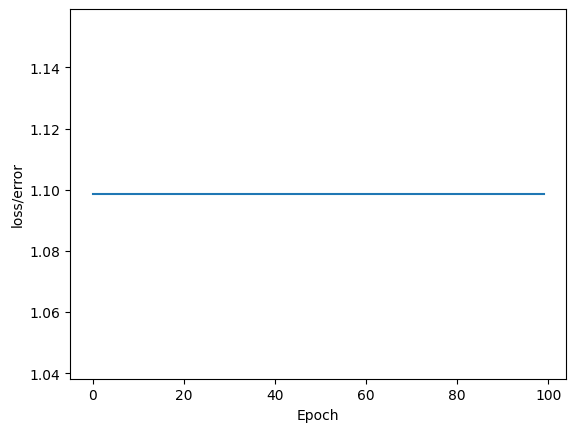

In [ ]:
# 生成圖表
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model1 on test dataset (validation model1 on test set)
with torch.no_grad(): #basically turn off back propogation
    y_eval = model1.forward(X_test) #X_test are features from our test set, y_eval will be predictions
    loss=criterion(y_eval,y_test)# Find the loss or error

In [ ]:
# 印出loss
loss

tensor(1.0986)

In [ ]:
correct=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val=model1.forward(data)

        # model辨別的結果
        print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # 結果正確與否
        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'we got {correct} correct!') # 正確的有幾個
print(f'the accuracy is {correct/len(y_test)}') # 準確率多高

1. tensor([0., 0., 0.]) 	 1 	 0
2. tensor([0., 0., 0.]) 	 2 	 0
3. tensor([0., 0., 0.]) 	 2 	 0
4. tensor([0., 0., 0.]) 	 1 	 0
5. tensor([0., 0., 0.]) 	 0 	 0
6. tensor([0., 0., 0.]) 	 2 	 0
7. tensor([0., 0., 0.]) 	 0 	 0
8. tensor([0., 0., 0.]) 	 0 	 0
9. tensor([0., 0., 0.]) 	 2 	 0
10. tensor([0., 0., 0.]) 	 1 	 0
11. tensor([0., 0., 0.]) 	 0 	 0
12. tensor([0., 0., 0.]) 	 1 	 0
13. tensor([0., 0., 0.]) 	 1 	 0
14. tensor([0., 0., 0.]) 	 0 	 0
15. tensor([0., 0., 0.]) 	 2 	 0
16. tensor([0., 0., 0.]) 	 2 	 0
17. tensor([0., 0., 0.]) 	 2 	 0
18. tensor([0., 0., 0.]) 	 2 	 0
19. tensor([0., 0., 0.]) 	 0 	 0
20. tensor([0., 0., 0.]) 	 2 	 0
21. tensor([0., 0., 0.]) 	 2 	 0
22. tensor([0., 0., 0.]) 	 1 	 0
23. tensor([0., 0., 0.]) 	 0 	 0
24. tensor([0., 0., 0.]) 	 0 	 0
25. tensor([0., 0., 0.]) 	 1 	 0
26. tensor([0., 0., 0.]) 	 0 	 0
27. tensor([0., 0., 0.]) 	 0 	 0
28. tensor([0., 0., 0.]) 	 2 	 0
29. tensor([0., 0., 0.]) 	 1 	 0
30. tensor([0., 0., 0.]) 	 2 	 0
31. tensor([0., 0.,

# Model 2

In [ ]:
#hidden nodes = 5, activation function = ReLu, Optimizer = Adam, learning epochs = 200, learning rate=0.04
class Model2(nn.Module):

    def __init__ (self,in_features = 7, h1 = 5, out_features = 3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.out=nn.Linear(h1,out_features)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.out(x))

        return x

torch.manual_seed(40)
model2=Model2()

# Set the criterion of model2 to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model2.parameters(),lr=0.04)

In [ ]:
model2

Model2(
  (fc1): Linear(in_features=7, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=3, bias=True)
)

In [ ]:
#Train the model2
epochs = 200
losses = []
for i in range(epochs):
    #go forward and get a predictions
    y_pred=model2.forward(X_train)#get predicted results

    #Measure the loss/error, gonna be heigh at first
    loss=criterion(y_pred,y_train)

    #Keep trach the loss
    losses.append(loss.detach().numpy())

    #print every 10 epoch
    if i%10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    #Do some back propagation: take the error rate of forward propagation and feed it back
    #thru the network to find tuns and weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.109689712524414
Epoch: 10 and loss: 1.09853994846344
Epoch: 20 and loss: 1.0985366106033325
Epoch: 30 and loss: 1.098533034324646
Epoch: 40 and loss: 1.098533272743225
Epoch: 50 and loss: 1.0985331535339355
Epoch: 60 and loss: 1.098533034324646
Epoch: 70 and loss: 1.0985326766967773
Epoch: 80 and loss: 1.0985326766967773
Epoch: 90 and loss: 1.098533034324646
Epoch: 100 and loss: 1.0985326766967773
Epoch: 110 and loss: 1.098532795906067
Epoch: 120 and loss: 1.0985329151153564
Epoch: 130 and loss: 1.0985326766967773
Epoch: 140 and loss: 1.0985326766967773
Epoch: 150 and loss: 1.098532795906067
Epoch: 160 and loss: 1.0985326766967773
Epoch: 170 and loss: 1.098533034324646
Epoch: 180 and loss: 1.0985326766967773
Epoch: 190 and loss: 1.0985326766967773


Text(0.5, 0, 'Epoch')

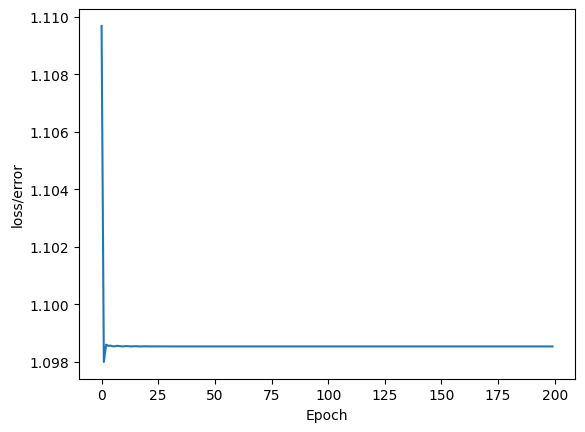

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model2 on test dataset (validation model1 on test set)
with torch.no_grad(): #basically turn off back propogation
    y_eval = model2.forward(X_test) #X_test are features from our test set, y_eval will be predictions
    loss=criterion(y_eval,y_test)# Find the loss or error

In [ ]:
loss

tensor(1.0993)

In [ ]:
correct=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val=model2.forward(data)

        print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'we got {correct} correct!')
print(f'the accuracy is {correct/len(y_test)}')

1. tensor([0.0000, 0.0267, 0.0000]) 	 1 	 1
2. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
3. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
4. tensor([0.0000, 0.0267, 0.0000]) 	 1 	 1
5. tensor([0.0000, 0.0267, 0.0000]) 	 0 	 1
6. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
7. tensor([0.0000, 0.0267, 0.0000]) 	 0 	 1
8. tensor([0.0000, 0.0267, 0.0000]) 	 0 	 1
9. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
10. tensor([0.0000, 0.0267, 0.0000]) 	 1 	 1
11. tensor([0.0000, 0.0267, 0.0000]) 	 0 	 1
12. tensor([0.0000, 0.0267, 0.0000]) 	 1 	 1
13. tensor([0.0000, 0.0267, 0.0000]) 	 1 	 1
14. tensor([0.0000, 0.0267, 0.0000]) 	 0 	 1
15. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
16. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
17. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
18. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
19. tensor([0.0000, 0.0267, 0.0000]) 	 0 	 1
20. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
21. tensor([0.0000, 0.0267, 0.0000]) 	 2 	 1
22. tensor([0.0000, 0.0267, 0.0000]) 	 1 	 1
23. tensor([0.0000,

# Model3

In [ ]:
#hidden nodes = 11, activation function = ReLu, Optimizer = Adam, learning epochs = 300, learning rate = 0.02
class Model3(nn.Module):

    def __init__ (self,in_features = 7, h1 = 11, out_features = 3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.out=nn.Linear(h1,out_features)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.out(x))

        return x

#pick a manual seed for randomization
torch.manual_seed(41)

# Creat a model1
model3=Model3()

criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model3.parameters(),lr=0.02)

In [ ]:
model3

Model3(
  (fc1): Linear(in_features=7, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [ ]:
#Train the model3
epochs = 300
losses = []
for i in range(epochs):
    #go forward and get a predictions
    y_pred=model3.forward(X_train)#get predicted results

    #Measure the loss/error, gonna be heigh at first
    loss=criterion(y_pred,y_train)

    #Keep trach the loss
    losses.append(loss.detach().numpy())

    #print every 10 epoch
    if i%10 ==0:
        print(f'Epoch: {i} and loss: {loss}')
    #Do some back propagation: take the error rate of forward propagation and feed it back
    #thru the network to find tuns and weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.115018606185913
Epoch: 10 and loss: 1.0986120700836182
Epoch: 20 and loss: 1.0986120700836182
Epoch: 30 and loss: 1.0986120700836182
Epoch: 40 and loss: 1.0986120700836182
Epoch: 50 and loss: 1.0986120700836182
Epoch: 60 and loss: 1.0986120700836182
Epoch: 70 and loss: 1.0986120700836182
Epoch: 80 and loss: 1.0986120700836182
Epoch: 90 and loss: 1.0986120700836182
Epoch: 100 and loss: 1.0986120700836182
Epoch: 110 and loss: 1.0986120700836182
Epoch: 120 and loss: 1.0986120700836182
Epoch: 130 and loss: 1.0986120700836182
Epoch: 140 and loss: 1.0986120700836182
Epoch: 150 and loss: 1.0986120700836182
Epoch: 160 and loss: 1.0986120700836182
Epoch: 170 and loss: 1.0986120700836182
Epoch: 180 and loss: 1.0986120700836182
Epoch: 190 and loss: 1.0986120700836182
Epoch: 200 and loss: 1.0986120700836182
Epoch: 210 and loss: 1.0986120700836182
Epoch: 220 and loss: 1.0986120700836182
Epoch: 230 and loss: 1.0986120700836182
Epoch: 240 and loss: 1.0986120700836182
Epoch: 250 a

Text(0.5, 0, 'Epoch')

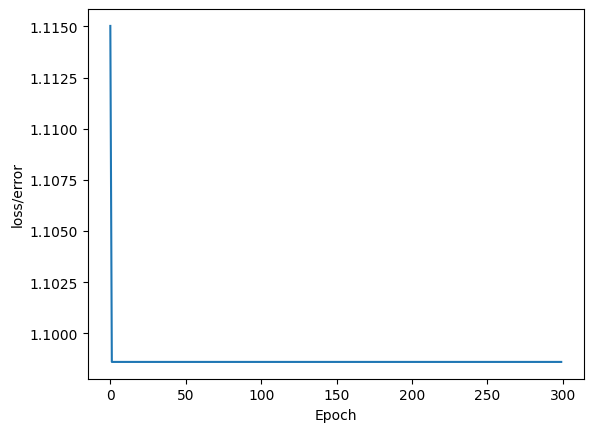

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model3 on test dataset (validation model1 on test set)
with torch.no_grad(): #basically turn off back propogation
    y_eval = model3.forward(X_test) #X_test are features from our test set, y_eval will be predictions
    loss=criterion(y_eval,y_test)# Find the loss or error

In [ ]:
loss

tensor(1.0986)

In [ ]:
correct=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val=model3.forward(data)

        print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'we got {correct} correct!')
print(f'the accuracy is {correct/len(y_test)}')

1. tensor([0., 0., 0.]) 	 1 	 0
2. tensor([0., 0., 0.]) 	 2 	 0
3. tensor([0., 0., 0.]) 	 2 	 0
4. tensor([0., 0., 0.]) 	 1 	 0
5. tensor([0., 0., 0.]) 	 0 	 0
6. tensor([0., 0., 0.]) 	 2 	 0
7. tensor([0., 0., 0.]) 	 0 	 0
8. tensor([0., 0., 0.]) 	 0 	 0
9. tensor([0., 0., 0.]) 	 2 	 0
10. tensor([0., 0., 0.]) 	 1 	 0
11. tensor([0., 0., 0.]) 	 0 	 0
12. tensor([0., 0., 0.]) 	 1 	 0
13. tensor([0., 0., 0.]) 	 1 	 0
14. tensor([0., 0., 0.]) 	 0 	 0
15. tensor([0., 0., 0.]) 	 2 	 0
16. tensor([0., 0., 0.]) 	 2 	 0
17. tensor([0., 0., 0.]) 	 2 	 0
18. tensor([0., 0., 0.]) 	 2 	 0
19. tensor([0., 0., 0.]) 	 0 	 0
20. tensor([0., 0., 0.]) 	 2 	 0
21. tensor([0., 0., 0.]) 	 2 	 0
22. tensor([0., 0., 0.]) 	 1 	 0
23. tensor([0., 0., 0.]) 	 0 	 0
24. tensor([0., 0., 0.]) 	 0 	 0
25. tensor([0., 0., 0.]) 	 1 	 0
26. tensor([0., 0., 0.]) 	 0 	 0
27. tensor([0., 0., 0.]) 	 0 	 0
28. tensor([0., 0., 0.]) 	 2 	 0
29. tensor([0., 0., 0.]) 	 1 	 0
30. tensor([0., 0., 0.]) 	 2 	 0
31. tensor([0., 0.,

# Model4

In [ ]:
#hidden nodes = 8, activation function = ReLu, Optimizer = SGD, learning epochs = 100, learning rate = 0.01, momentum = 0.9
class Model4(nn.Module):

    def __init__ (self,in_features = 7, h1 = 8, out_features = 3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.out=nn.Linear(h1,out_features)

    def forward(self,x):
        x=torch.tanh(self.fc1(x))
        x=torch.tanh(self.out(x))

        return x

torch.manual_seed(45)

model4=Model4()

criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model3.parameters(),lr=0.01,momentum=0.9)

In [ ]:
model4

Model4(
  (fc1): Linear(in_features=7, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
#Train the model4
epochs = 100
losses = []
for i in range(epochs):
    #go forward and get a predictions
    y_pred=model4.forward(X_train)#get predicted results

    #Measure the loss/error, gonna be heigh at first
    loss=criterion(y_pred,y_train)

    #Keep trach the loss
    losses.append(loss.detach().numpy())

    #print every 10 epoch
    if i%10 ==0:
        print(f'Epoch: {i} and loss: {loss}')
    #Do some back propagation: take the error rate of forward propagation and feed it back
    #thru the network to find tuns and weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1402167081832886
Epoch: 10 and loss: 1.1402167081832886
Epoch: 20 and loss: 1.1402167081832886
Epoch: 30 and loss: 1.1402167081832886
Epoch: 40 and loss: 1.1402167081832886
Epoch: 50 and loss: 1.1402167081832886
Epoch: 60 and loss: 1.1402167081832886
Epoch: 70 and loss: 1.1402167081832886
Epoch: 80 and loss: 1.1402167081832886
Epoch: 90 and loss: 1.1402167081832886


Text(0.5, 0, 'Epoch')

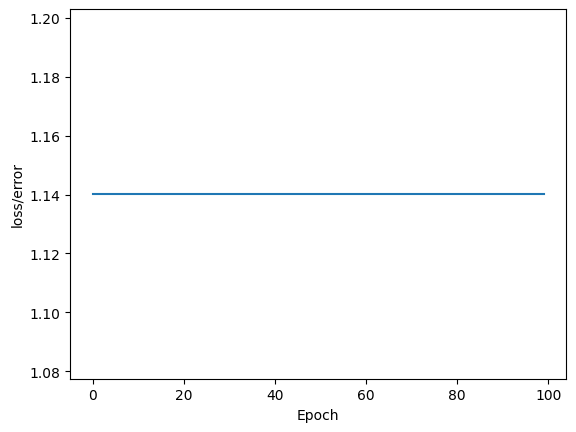

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [ ]:
loss

tensor(1.1402, grad_fn=<NllLossBackward0>)

In [ ]:
correct=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val=model4.forward(data)

        print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'we got {correct} correct!')
print(f'the accuracy is {correct/len(y_test)}')

1. tensor([-0.0478, -0.6065, -0.9136]) 	 1 	 0
2. tensor([-0.1449, -0.5812, -0.8910]) 	 2 	 0
3. tensor([-0.1478, -0.5801, -0.8901]) 	 2 	 0
4. tensor([-0.0011, -0.6148, -0.9194]) 	 1 	 0
5. tensor([-0.0077, -0.6131, -0.9183]) 	 0 	 0
6. tensor([-0.1236, -0.5868, -0.8965]) 	 2 	 0
7. tensor([-0.0788, -0.5984, -0.9069]) 	 0 	 0
8. tensor([-0.0391, -0.6079, -0.9148]) 	 0 	 0
9. tensor([-0.1457, -0.5806, -0.8907]) 	 2 	 0
10. tensor([-0.0411, -0.6087, -0.9156]) 	 1 	 0
11. tensor([-0.0211, -0.6115, -0.9174]) 	 0 	 0
12. tensor([-0.0219, -0.6127, -0.9184]) 	 1 	 0
13. tensor([-0.0536, -0.6054, -0.9127]) 	 1 	 0
14. tensor([-0.0267, -0.6110, -0.9171]) 	 0 	 0
15. tensor([-0.1336, -0.5835, -0.8936]) 	 2 	 0
16. tensor([-0.0599, -0.6027, -0.9106]) 	 2 	 0
17. tensor([-0.0851, -0.5963, -0.9053]) 	 2 	 0
18. tensor([-0.1882, -0.5690, -0.8786]) 	 2 	 0
19. tensor([-0.0501, -0.6056, -0.9130]) 	 0 	 0
20. tensor([-0.1436, -0.5813, -0.8913]) 	 2 	 0
21. tensor([-0.0271, -0.6095, -0.9160]) 	 2 	 0
2

# Model5

In [ ]:
#hidden nodes = 11, activation function = Tanh, Optimizer = SGD, learning epochs = 300, learning rate = 0.01, momentum = 0.9
class Model5(nn.Module):

    def __init__(self, in_features = 7, h1 = 11, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.out = nn.Linear(h1, out_features)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Use tanh activation
        x = torch.tanh(self.out(x))  # Use tanh activation

        return x

torch.manual_seed(41)
model5=Model5()
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model5.parameters(),lr=0.01)

In [ ]:
model5

Model5(
  (fc1): Linear(in_features=7, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [ ]:
#Train the model5
epochs = 300
losses = []
for i in range(epochs):
    #go forward and get a predictions
    y_pred=model5.forward(X_train)#get predicted results

    #Measure the loss/error, gonna be heigh at first
    loss=criterion(y_pred,y_train)

    #Keep trach the loss
    losses.append(loss.detach().numpy())

    #print every 10 epoch
    if i%10 ==0:
        print(f'Epoch: {i} and loss: {loss}')
    #Do some back propagation: take the error rate of forward propagation and feed it back
    #thru the network to find tuns and weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.152509093284607
Epoch: 10 and loss: 1.123407244682312
Epoch: 20 and loss: 1.1077983379364014
Epoch: 30 and loss: 1.0995292663574219
Epoch: 40 and loss: 1.09438955783844
Epoch: 50 and loss: 1.0903668403625488
Epoch: 60 and loss: 1.0868369340896606
Epoch: 70 and loss: 1.0836045742034912
Epoch: 80 and loss: 1.080456256866455
Epoch: 90 and loss: 1.0772016048431396
Epoch: 100 and loss: 1.0736868381500244
Epoch: 110 and loss: 1.0697412490844727
Epoch: 120 and loss: 1.0650432109832764
Epoch: 130 and loss: 1.0585294961929321
Epoch: 140 and loss: 1.0435434579849243
Epoch: 150 and loss: 1.0072779655456543
Epoch: 160 and loss: 0.9957101941108704
Epoch: 170 and loss: 0.9858642816543579
Epoch: 180 and loss: 0.9764971733093262
Epoch: 190 and loss: 0.9674360156059265
Epoch: 200 and loss: 0.9585952758789062
Epoch: 210 and loss: 0.9499384760856628
Epoch: 220 and loss: 0.9414558410644531
Epoch: 230 and loss: 0.933151125907898
Epoch: 240 and loss: 0.9250349998474121
Epoch: 250 and lo

Text(0.5, 0, 'Epoch')

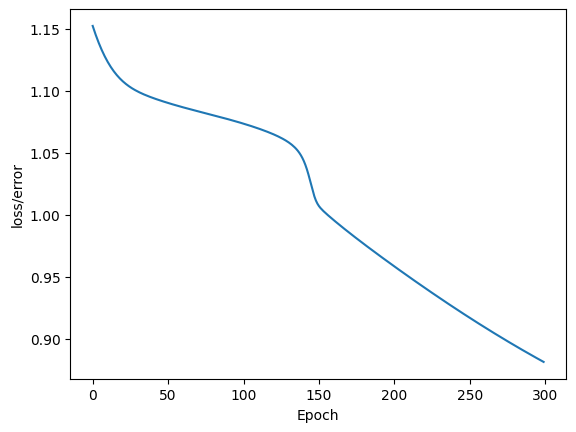

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model1 on test dataset (validation model1 on test set)
with torch.no_grad(): #basically turn off back propogation
    y_eval = model5.forward(X_test) #X_test are features from our test set, y_eval will be predictions
    loss=criterion(y_eval,y_test)# Find the loss or error

In [ ]:
loss

tensor(0.8998)

In [ ]:
correct=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val=model5.forward(data)

        print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'we got {correct} correct!')
print(f'the accuracy is {correct/len(y_test)}')

1. tensor([ 0.1269,  0.1083, -0.3365]) 	 1 	 0
2. tensor([-0.2985, -0.2184,  0.3420]) 	 2 	 2
3. tensor([-0.3583, -0.2659,  0.4373]) 	 2 	 2
4. tensor([ 0.3299,  0.2647, -0.6137]) 	 1 	 0
5. tensor([ 0.3053,  0.2463, -0.5832]) 	 0 	 0
6. tensor([-0.2541, -0.1830,  0.2726]) 	 2 	 2
7. tensor([-0.0134,  0.0023, -0.1280]) 	 0 	 1
8. tensor([ 0.1657,  0.1384, -0.3943]) 	 0 	 0
9. tensor([-0.3822, -0.2854,  0.4786]) 	 2 	 2
10. tensor([ 0.1235,  0.1058, -0.3242]) 	 1 	 0
11. tensor([ 0.2791,  0.2258, -0.5515]) 	 0 	 0
12. tensor([ 0.2804,  0.2261, -0.5503]) 	 1 	 0
13. tensor([ 0.1057,  0.0920, -0.3063]) 	 1 	 0
14. tensor([ 0.2454,  0.1993, -0.5048]) 	 0 	 0
15. tensor([-0.3337, -0.2455,  0.4023]) 	 2 	 2
16. tensor([ 0.0635,  0.0609, -0.2441]) 	 2 	 0
17. tensor([-0.1593, -0.1089,  0.1277]) 	 2 	 2
18. tensor([-0.4225, -0.3190,  0.5349]) 	 2 	 2
19. tensor([ 0.1168,  0.1010, -0.3251]) 	 0 	 0
20. tensor([-0.3456, -0.2559,  0.4212]) 	 2 	 2
21. tensor([ 0.1734,  0.1459, -0.4021]) 	 2 	 0
2